In [20]:
# script to plot cell death assay data and expression heatmaps for candidate genes
import pandas, numpy
import config, database_utils
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
% matplotlib inline

connect = database_utils.get_connection()
cursor = connect.cursor()

hi_color = (155/255, 97/255, 153/255)

figure_path = '../figures/'
data_path = '../data/katjas_data/apoptosis/'

In [2]:
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42  # TrueType fonts for ease of editing in illustrator
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7.0
mpl.rcParams['savefig.dpi'] = 500


In [3]:
otuNT = pandas.read_table(data_path + 'OTUD6A_high_no_TRAIL.txt',header=0)
otuNT.drop(columns='Unnamed: 2',inplace=True)

In [4]:
otuNT.head()

,IntDen,TimeOfDeath_trunc_48h,TimeOfDeath_trunc_24h
0,4890.231111,810,810
1,3813.566400,2730,1440
2,1337.691200,540,540
3,1886.958222,2730,1440
4,1712.333333,2730,1440


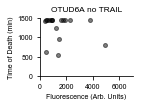

In [5]:
otuNT_gzero = otuNT.loc[otuNT['IntDen']>0,]
plt.figure(figsize=(2,1.5))
plt.plot(otuNT_gzero['IntDen'],otuNT_gzero['TimeOfDeath_trunc_24h'],
         marker='.',markersize=8,linestyle='',color='black',alpha=0.5)
plt.xlabel('Fluorescence (Arb. Units)')
plt.ylabel('Time of Death (min)')
plt.title('OTUD6A no TRAIL')
plt.ylim([0,1500])
plt.xlim([0,7000])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
outfile = figure_path + 'OTUD6A_high_no_TRAIL_scatter'
plt.savefig(outfile + '.png',fmt='png',dpi=300)
plt.savefig(outfile + '.pdf',fmt='pdf',dpi=300)

plt.show()

In [6]:
otuT = pandas.read_table(data_path + 'OTUD6A_high_TRAIL.txt',header=0)
otuT.drop(columns='Unnamed: 2',inplace=True)
otuT.head()

,IntDen,TimeOfDeath_trunc_48h,TimeOfDeath_trunc_24h
0,732.663111,2730,1440
1,2929.012622,180,180
2,1139.604267,705,705
3,544.984533,165,165
4,6816.850311,135,135


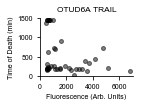

In [7]:
otuT_gzero = otuT.loc[otuT['IntDen']>0,]
plt.figure(figsize=(2,1.5))
plt.plot(otuT_gzero['IntDen'],otuT_gzero['TimeOfDeath_trunc_24h'],
         marker='.',markersize=8,linestyle='',color='black',alpha=0.5)
plt.xlabel('Fluorescence (Arb. Units)')
plt.ylabel('Time of Death (min)')
plt.title('OTUD6A TRAIL')
plt.ylim([0,1500])
plt.xlim([0,7000])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
outfile = figure_path + 'OTUD6A_high_TRAIL_scatter'
plt.savefig(outfile + '.png',fmt='png',dpi=300)
plt.savefig(outfile + '.pdf',fmt='pdf',dpi=300)

plt.show()

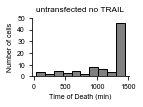

In [8]:
otuNT_zero = otuNT.loc[otuNT['IntDen']==0,]
plt.figure(figsize=(2,1.5))
plt.hist(otuNT['TimeOfDeath_trunc_24h'],bins=10,color='grey',edgecolor='black')
plt.ylabel('Number of cells')
plt.xlabel('Time of Death (min)')
plt.ylim([0,50])
plt.yticks(range(0,51,10),range(0,51,10))
plt.title('untransfected no TRAIL')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
outfile = figure_path + 'OTUD6A_no_TRAIL_untransf_histo'
plt.savefig(outfile + '.png',fmt='png',dpi=300)
plt.savefig(outfile + '.pdf',fmt='pdf',dpi=300)
plt.show()

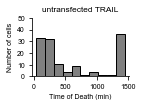

In [9]:
otuT_zero = otuT.loc[otuT['IntDen']==0,]
plt.figure(figsize=(2,1.5))
plt.hist(otuT['TimeOfDeath_trunc_24h'],bins=10,color='grey',edgecolor='black')
plt.ylabel('Number of cells')
plt.xlabel('Time of Death (min)')
plt.ylim([0,50])
plt.yticks(range(0,51,10),range(0,51,10))
plt.title('untransfected TRAIL')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
outfile = figure_path + 'OTUD6A_TRAIL_untransf_histo'
plt.savefig(outfile + '.png',fmt='png',dpi=300)
plt.savefig(outfile + '.pdf',fmt='pdf',dpi=300)
plt.show()

ensgID                    C6ORF222  NHSL2  OTUD6A
Adipose subcutaneous      0.099483      0       0
Adipose visceral omentum  0.099072      0       0
Adrenal gland             0.159315      0       0
Artery aorta              1.156863      0       0
Artery coronary           0.179115      0       0
Artery tibial             0.158281      0       0
Brain basal ganglia       2.655690      0       0
Brain cerebellum          0.087196      0       0
Brain other               0.206282      0       0
Breast mammary tissue     0.113985      0       0


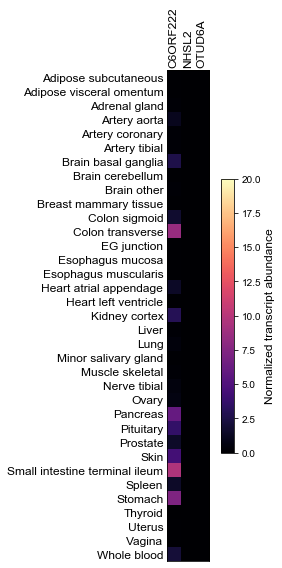

In [18]:
query = """select symbol,ensembl_gene_id_short 
            from horfeome_annotation_gencode27.gencode2entrez 
            where symbol in ('OTUD6A','NHSL2','C6ORF222') order by symbol"""
cursor.execute(query)
ensg_ids = [row[1] for row in cursor]
gene_symbols = [row[0].upper() for row in cursor]
map_dict = dict([(row[1],row[0].upper()) for row in cursor])

GTEx_expr_file = config.expr_file
GTEx = pandas.read_table(GTEx_expr_file,index_col=0)

file1 = open(config.data_path + 'GTExv6_JPnorm_subtypes_no_cell_publ.txt','r')
entries = file1.readlines()
file1.close()
publ_tissues = [line[:-1] for line in entries]
GTEx.rename(columns=dict(zip(GTEx.columns.tolist(),publ_tissues)),inplace=True)

cand_gtex = GTEx.loc[GTEx.index.isin(ensg_ids),]
cand_gtex = cand_gtex.drop(labels='Testis',axis=1)
tissues = cand_gtex.columns.tolist()
tissues[tissues.index('Esophagus gastroesophageal junction')] = 'EG junction'
cand_gtexT = cand_gtex.T
cand_gtexT.rename(columns=map_dict,inplace=True)
cand_gtexT['NHSL2'] = [0 for i in range(cand_gtexT.shape[0])]
cand_gtexT['OTUD6A'] = [0 for i in range(cand_gtexT.shape[0])]
print(cand_gtexT.head(10))

plt.figure(figsize=(5,8))
plt.imshow(cand_gtexT[['C6ORF222','NHSL2','OTUD6A']],cmap='magma',interpolation='nearest',vmin=0,vmax=20)
cbar = plt.colorbar(fraction=0.046, pad=0.04)
cbar.ax.set_ylabel(ylabel='Normalized transcript abundance',fontsize=12)
ax = plt.gca()
ax.xaxis.tick_top()
plt.yticks(range(cand_gtexT.shape[0]),tissues,fontsize=12)
plt.xticks(range(3),['C6ORF222','NHSL2','OTUD6A'],rotation=90,fontsize=12)
ax.tick_params(axis='both',which='both',length=0)
plt.tight_layout()
outfile = figure_path + 'cand_expr_patterns_GTEx_heatmap'
plt.savefig(outfile + '.pdf',format='pdf')
plt.savefig(outfile + '.png',format='png')
plt.show()

Gene ID                                          C6ORF222    OTUD6A     NHSL2
CD14-positive, CD16-negative classical monocyte       0.0  0.678072  2.000000
macrophage                                            0.0  0.263034  2.000000
inflammatory macrophage                               0.0  0.137504  1.584963
conventional dendritic cell                           0.0  0.263034  0.137504
CD4-positive, alpha-beta thymocyte                    0.0  0.765535  0.000000


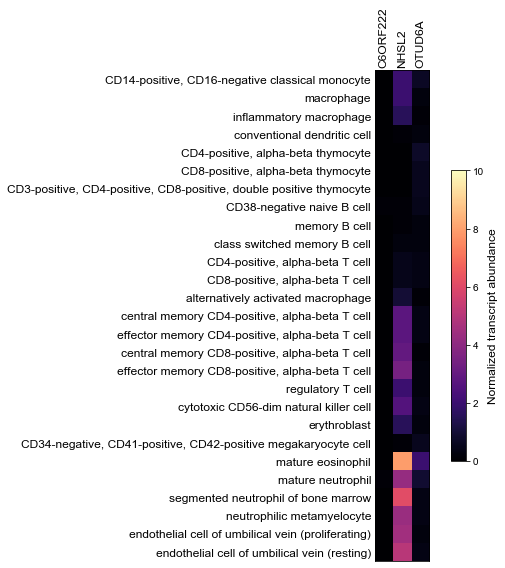

In [21]:
BLUEPRINT_expr_file = data_path + '/BLUEPRINT.RNAseq.tpms.tsv'
BP = pandas.read_table(BLUEPRINT_expr_file,header=4,index_col=0)
BP.drop(labels='Gene Name',axis=1,inplace=True)

cand_BP = BP.loc[BP.index.isin(ensg_ids),]
cand_BPT = cand_BP.T
cand_BPT.fillna(0,inplace=True)
cand_BPT = numpy.log2(cand_BPT+1)
cand_BPT.rename(columns=map_dict,inplace=True)
print(cand_BPT.head())

plt.figure(figsize=(8.5,8))
plt.imshow(cand_BPT[['C6ORF222','NHSL2','OTUD6A']],cmap='magma',interpolation='nearest',vmin=0,vmax=10)
cbar = plt.colorbar(fraction=0.026, pad=0.04)
cbar.ax.set_ylabel(ylabel='Normalized transcript abundance',fontsize=12)
ax = plt.gca()
ax.xaxis.tick_top()
plt.yticks(range(cand_BPT.shape[0]),cand_BPT.index,fontsize=12)
plt.xticks(range(3),['C6ORF222','NHSL2','OTUD6A'],rotation=90,fontsize=12)
ax.tick_params(axis='both',which='both',length=0)
plt.tight_layout()
outfile = figure_path + 'cand_expr_patterns_BP_heatmap'
plt.savefig(outfile + '.pdf',format='pdf')
plt.savefig(outfile + '.png',format='png')
plt.show()